In [1]:
#As inpout use the variables latest numbers
#As another input use th eforecast data


#debt
#external
#fiscal
#Curretn Account
#inflation
#reer
#rule of law
#corruption
#goverment
#average rating


#Model1 
#Variable	
#Intercept	
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#Inflation	#Average inflation during the last 3 Months (Monthly Update) *100	
#Rule law	#Standarized Ranking from WB (Annual update)	
#Dummy (1)	Turkey
#Dummy (2)Douth Africa



#Model 2
#Variable	
#Intercept	
#External_Total_Public 	External debt (foreign currency) relative to GDP (Quarterly update)
#Fiscal Balance	Average Fiscal balance of last 4 Quarters (Quarterly update) *100
#REER	Real Effective Exchange Rate
#Corruption		Standarized Ranking from WB (Annual update)
#Dummy (1)	turkey 
#Dummy (2) south africa




#Model 3
#Current_Account_to_GDP 	#Average Current Account balance of last 4 Quarters (Quarterly update) *100
#Public_Debt_GDP 	Public debt relative to GDP (Quarterly update)
#Government Effectiveness	Standarized Ranking from WB (Annual update)	 
#REER	Real Effective Exchange Rate
#Dummy (1)	turkey 
#Dummy (2) south africa



#Model 4
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)
#	Inflation	#Average inflation during the last 3 Months (Monthly Update) *100
#Rating	Average Rating (Mdys, S&P, Fitchs)
#Dummy (1)	turkey 
#Dummy (2) south africa



#Model 5
#Intercept	
#External_Total_Public 	#External debt (foreign currency) relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#REER	#Real Effective Exchange Rate	
#Rating	#Average Rating (Mdys, S&P, Fitchs)	Dummy (1)	Dummy (2)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'debt', positive
#'extd', positive
#'fiscal',  negative
#'current', negative
#'reer', negative
#'inflation', positive
#'rule',   negative
#'corruption', negative
#'effectiv',negative
#'rating',  negative
#'d001', positive
# 'd002'], positive


#higher reer, lower Cds, higher reer , less risk , higher reer more acquisiton power. 
#higher reer, lower yields
#if the number is hijger, m the czlok  depreciates, 

#version 1 most recent data last poitn in time
#version 2 average data, last point in tiome
#version 3 moist recent data, time series alst 3 months
#version 4 average data, time series last 3 month

In [2]:
#import packages

import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pandas.plotting import table
import os
from datetime import date
import seaborn as sns
from random import seed
from random import random
import numpy as np
import PIL
from PIL import Image
#import os
from PyPDF2 import PdfFileMerger
from codetiming import Timer
timeclock = Timer(name="class")
timeclock.start()
# Do something


In [3]:
# stablish date factors
today = str(date.today())
print(today)
#time stamp
end = str(today)


2021-11-23


# load database

In [4]:
#load database

#y="Yield_EUR"
y="Yield_USD"
y0='usd'
cross_tmp = pd.read_csv (r'K:\2020_2431\q\sandbox_hc\cross_tmp.csv')
cross_tmp = cross_tmp.drop_duplicates(keep='first')
cross_tmp=cross_tmp.reset_index(drop=True)
print(cross_tmp)

###create dummy
cross_tmp.loc[(cross_tmp['country'] == 'turkey') , 'd001'] = 1  
cross_tmp.loc[(cross_tmp['country'] != 'turkey') , 'd001'] = 0  
cross_tmp.loc[(cross_tmp['country'] == 'south africa') , 'd002'] = 1 
cross_tmp.loc[(cross_tmp['country'] != 'south africa') , 'd002'] = 0  

cross_tmp = cross_tmp[cross_tmp[str(y)].notnull()]
cross_tmp=cross_tmp.reset_index(drop=True)


cross_tmp.columns
print(cross_tmp)
cross_base=cross_tmp
cross_base = cross_base.drop_duplicates(keep='first')
cross_base=cross_base.reset_index(drop=True)

#cross_tmp=cross_tmp
#cross_base = cross_base.drop_duplicates(keep='first')
#cross_base=cross_base.reset_index(drop=True)



cross_tmp = cross_tmp[cross_tmp[str(y)].notnull()]
cross_tmp=cross_tmp.reset_index(drop=True)
print(cross_base)




####drop na yield

           country    debt    extd   fiscal  current    reer  inflation  rule  \
0           brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1            chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2            china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3         colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4          hungary  0.7718  0.1383 -0.04420 -0.03660   85.24   0.064658  0.49   
5        indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
6         malaysia  0.6680  0.0310 -0.05437  0.03730   83.81   0.022481  0.59   
7           mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
8           poland  0.5850  0.1450  0.05090  0.00120   91.34   0.069906  0.45   
9           russia  0.2000  0.0350  0.01582  0.05900   80.00   0.081517 -0.72   
10    south africa  0.7070  0.0620 -0.01700  0.05609   77.71   0.050432 -0.08   
11        thailand  0.5130  

In [5]:
#print(cross_tmp)
#print(cross_base)

# Model Cross secitonal 001

In [6]:
#Model Cross secitonal 001
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#Inflation	#Average inflation during the last 3 Months (Monthly Update) *100	
#Rule law	#Standarized Ranking from WB (Annual update)	
#Dummy (1)	Turkey
#Dummy (2)Douth Africa

#'fiscal',  negative
#'inflation', positive
#'rule',   negative
#'d001', positive
# 'd002'], positive
name=['m011']
m011=cross_tmp[[str(y), 'fiscal',  'inflation', 'rule', 'd001', 'd002']]
print(m011)

Y = m011[str(y)]
X = m011[['fiscal', 'inflation', 'rule', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
#print(p) 
p = pd.DataFrame(p, columns = name)
print(p)   

cross_base = pd.concat([cross_base,p], axis=1) 
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

    Yield_USD   fiscal  inflation  rule  d001  d002
0        3.79 -0.04480   0.106544 -0.18   0.0   0.0
1        2.17 -0.13160   0.060127  1.07   0.0   0.0
2        1.41  0.04461   0.014855 -0.27   0.0   0.0
3        3.68 -0.06490   0.045708 -0.42   0.0   0.0
4        2.34 -0.03901   0.016537 -0.34   0.0   0.0
5        2.85 -0.02520   0.062236 -0.66   0.0   0.0
6        2.74  0.01582   0.081517 -0.72   0.0   0.0
7        4.25 -0.01700   0.050432 -0.08   0.0   1.0
8        1.90 -0.02060   0.022969  1.05   0.0   0.0
9        1.31 -0.01860   0.041564  1.36   0.0   0.0
10       1.21 -0.01170   0.037793  2.02   0.0   0.0
11       2.28 -0.07895   0.026283  0.28   0.0   0.0
12       6.54  0.00000   0.069906 -0.70   0.0   0.0
13       2.42 -0.03270   0.058333 -0.49   0.0   0.0
14       2.09 -0.09177   0.034091 -0.48   0.0   0.0
15       5.37  0.03890   0.014855 -0.58   0.0   0.0
        m011
0   3.715383
1   1.652036
2   3.045926
3   3.045237
4   2.728224
5   3.648438
6   4.140936
7   4.250000

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Model 2

In [7]:
#Model 2
#Variable	
#Intercept	
#External_Total_Public 	External debt (foreign currency) relative to GDP (Quarterly update)
#Fiscal Balance	Average Fiscal balance of last 4 Quarters (Quarterly update) *100
#REER	Real Effective Exchange Rate
#Corruption		Standarized Ranking from WB (Annual update)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'extd', positive
#'fiscal',  negative
#'reer', negative
#'corruption', negative
#'d001', positive
# 'd002'], positive



name=['m021']
m021=cross_tmp[[str(y), 'extd','fiscal',  'reer', 'corruption', 'd001', 'd002']]

Y = m021[str(y)]
X = m021[['extd','fiscal',  'reer', 'corruption', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1)
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

[4.39103077 1.6180634  2.24046031 3.04992289 2.95562822 3.76388205
 4.2524997  4.25       1.22821369 1.7101699  1.49036529 2.63569407
 3.84387372 2.94243689 2.09627716 3.88148193]
        m021
0   4.391031
1   1.618063
2   2.240460
3   3.049923
4   2.955628
5   3.763882
6   4.252500
7   4.250000
8   1.228214
9   1.710170
10  1.490365
11  2.635694
12  3.843874
13  2.942437
14  2.096277
15  3.881482
         country    debt    extd   fiscal  current    reer  inflation  rule  \
0         brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1          chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2          china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3       colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4      indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
5         mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
6         russia  0.2000  0.0350  0.01582  0.0

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Model 3

In [8]:
#Model 3
#Current_Account_to_GDP 	#Average Current Account balance of last 4 Quarters (Quarterly update) *100
#Public_Debt_GDP 	Public debt relative to GDP (Quarterly update)
#Government Effectiveness	Standarized Ranking from WB (Annual update)	 
#REER	Real Effective Exchange Rate
#Dummy (1)	turkey 
#Dummy (2) south africa

#'country', 
#'cds', 
#'debt', positive
#'current', negative
#'reer', negative
#'effectiv',negative
#'d001', positive
# 'd002'], positive



name=['m031']
m031=cross_tmp[[str(y), 'debt','current',  'reer', 'effectiv', 'd001', 'd002']]

Y = m031[str(y)]
X = m031[['debt','current',  'reer', 'effectiv', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1)
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)

[4.20770136 2.04657221 1.96987913 3.70432312 3.0523774  3.67847807
 3.18300571 4.25       1.08912079 1.83392909 0.56358605 2.82644693
 3.77287231 3.40355991 2.87275651 3.89539142]
        m031
0   4.207701
1   2.046572
2   1.969879
3   3.704323
4   3.052377
5   3.678478
6   3.183006
7   4.250000
8   1.089121
9   1.833929
10  0.563586
11  2.826447
12  3.772872
13  3.403560
14  2.872757
15  3.895391
         country    debt    extd   fiscal  current    reer  inflation  rule  \
0         brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1          chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2          china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3       colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4      indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
5         mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
6         russia  0.2000  0.0350  0.01582  0.0

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Model 4

In [9]:
#Model 4
#Public_Debt_GDP 	#Public debt relative to GDP (Quarterly update)
#	Inflation	#Average inflation during the last 3 Months (Monthly Update) *100
#Rating	Average Rating (Mdys, S&P, Fitchs)
#Dummy (1)	turkey 
#Dummy (2) south africa

#'country', 
#'cds', 
#'debt', positive
#'inflation', positive
#'rating',  negative
#'d001', positive
# 'd002'], positive

name=['m041']
m041=cross_tmp[[str(y), 'debt','inflation',  'rating', 'd001', 'd002']]

Y = m041[str(y)]
X = m041[['debt','inflation',  'rating', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1)
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)
print("Compelte")

[4.35077328 1.93413301 1.5075151  3.27276993 2.87761934 2.92656128
 3.24920446 4.25       1.41931712 1.0857338  0.58610557 2.95233975
 5.13916821 2.70888722 2.83989424 5.24997768]
        m041
0   4.350773
1   1.934133
2   1.507515
3   3.272770
4   2.877619
5   2.926561
6   3.249204
7   4.250000
8   1.419317
9   1.085734
10  0.586106
11  2.952340
12  5.139168
13  2.708887
14  2.839894
15  5.249978
         country    debt    extd   fiscal  current    reer  inflation  rule  \
0         brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1          chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2          china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3       colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4      indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
5         mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
6         russia  0.2000  0.0350  0.01582  0.0

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Model 5

In [10]:
#Model 5

#Intercept	
#External_Total_Public 	#External debt (foreign currency) relative to GDP (Quarterly update)	
#Fiscal Balance	#Average Fiscal balance of last 4 Quarters (Quarterly update) *100	
#REER	#Real Effective Exchange Rate	
#Rating	#Average Rating (Mdys, S&P, Fitchs)	Dummy (1)	Dummy (2)
#Dummy (1)	turkey 
#Dummy (2) south africa



#'country', 
#'cds', 
#'extd', positive
#'fiscal',  negative
#'reer', negative
#'rating',  negative
#'d001', positive
# 'd002'], positive



name=['m051']
m051=cross_tmp[[str(y), 'extd','fiscal', 'reer','rating', 'd001', 'd002']]

Y = m051[str(y)]
X = m051[['extd','fiscal', 'reer','rating', 'd001', 'd002']]
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()
reg.summary()

p = reg.predict()
#p=p.transpose()
print(p) 
p = pd.DataFrame(data = p, columns = name)
print(p)                        
cross_base = pd.concat([cross_base,p], axis=1)
print(cross_base)
#cross_base.to_csv (r'K:\2020_2431\q\sandbox\cross_base.csv', index = False, header=True)
print("Compelte")

[4.20960921 1.58768212 1.72338555 3.40939717 2.97309765 2.93066837
 3.26549955 4.25       1.52378435 1.1606281  0.67401127 2.87928473
 5.04635259 2.68110844 2.50550824 5.52998265]
        m051
0   4.209609
1   1.587682
2   1.723386
3   3.409397
4   2.973098
5   2.930668
6   3.265500
7   4.250000
8   1.523784
9   1.160628
10  0.674011
11  2.879285
12  5.046353
13  2.681108
14  2.505508
15  5.529983
         country    debt    extd   fiscal  current    reer  inflation  rule  \
0         brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1          chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2          china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3       colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4      indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
5         mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
6         russia  0.2000  0.0350  0.01582  0.0

C:\Anaconda_2020.11\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Anaconda_2020.11\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Residuals

In [11]:
#aaaaaa

#EMCDS Macroeconomic Model (Difference Market -Model Estimate)
#Positive (Market > Model) the model implies lower risk thant what the market prices.
#Negative (Market < Model) the modle implies higher risk thatn what the market prices.

cross_base['r_m011']=(cross_base[str(y)] - cross_base['m011'])
cross_base['r_m021']=(cross_base[str(y)] - cross_base['m021'])
cross_base['r_m031']=(cross_base[str(y)] - cross_base['m031'])
cross_base['r_m041']=(cross_base[str(y)] - cross_base['m041'])
cross_base['r_m051']=(cross_base[str(y)] - cross_base['m051'])
cross_base.to_csv (r'K:\2020_2431\q\sandbox_hc\cross_base'+str(y0)+'.csv', index = False, header=True)
economic=cross_base
print(cross_base)
print(economic)
print("Complete")

         country    debt    extd   fiscal  current    reer  inflation  rule  \
0         brazil  0.7788  0.0496 -0.04480  0.01113   57.93   0.106544 -0.18   
1          chile  0.4010  0.1600 -0.13160 -0.06342   82.60   0.060127  1.07   
2          china  0.6820  0.0080  0.04461  0.01633  129.80   0.014855 -0.27   
3       colombia  0.6468  0.2462 -0.06490 -0.06561   69.37   0.045708 -0.42   
4      indonesia  0.3946  0.1271 -0.03901  0.01448   90.47   0.016537 -0.34   
5         mexico  0.4316  0.0919 -0.02520  0.01566   81.87   0.062236 -0.66   
6         russia  0.2000  0.0350  0.01582  0.05900   80.00   0.081517 -0.72   
7   south africa  0.7070  0.0620 -0.01700  0.05609   77.71   0.050432 -0.08   
8         israel  0.7360  0.1190 -0.02060  0.01448  116.16   0.022969  1.05   
9        belgium  1.1889  0.0000 -0.01860  0.02990  101.71   0.041564  1.36   
10       finland  0.7714  0.0000 -0.01170  0.03500   97.18   0.037793  2.02   
11         italy  1.5626  0.0018 -0.07895  0.04200  

In [12]:
###Graph step
##### show ecocoemia varaibles for each case in a table. , print table
####graph for each cds and teh varaibles x5,sort
#graph with each residaul of the modesl  x5, sort

##grouped filesaall models  x1
###groups all doels residual sorted x1
economic2=economic

In [13]:
#table summary econcomic varaibles

summ = pd.read_csv (r'K:\2020_2431\q\sandbox\summary_table.csv')
#summ = summ[summ.symbol != 'ARS']
#summ=summ[['order','region','country','symbol']]
summ=summ[['order','region','country']]
summ['country']=summ['country'].str.lower()
#print(summ)
#print(economic)

#####adjust variabvles
economic['debt']=economic['debt'].round(2)
#economic['debt']=economic['debt'].multiply(100)
economic['extd']=economic['extd'].round(2)
#economic['extd']=economic['extd'].multiply(100)
economic['inflation']=economic['inflation'].round(4)
#economic['inflation']=economic['inflation'].multiply(100)
economic['current']=economic['current'].round(4)
economic['fiscal']=economic['fiscal'].round(4)
economic['reer']=economic['reer'].round()

economic1=economic[['country', str(y), 'debt', 'extd', 'fiscal', 'current', 'reer','inflation', 'rule', 'corruption', 'effectiv', 'rating']]
#economic1=pd.merge(summ, economic1,  how='left', left_on=['country'], right_on = ['country'])
print(economic1)

print("Complete")

         country  Yield_USD  debt  extd  fiscal  current   reer  inflation  \
0         brazil       3.79  0.78  0.05 -0.0448   0.0111   58.0     0.1065   
1          chile       2.17  0.40  0.16 -0.1316  -0.0634   83.0     0.0601   
2          china       1.41  0.68  0.01  0.0446   0.0163  130.0     0.0149   
3       colombia       3.68  0.65  0.25 -0.0649  -0.0656   69.0     0.0457   
4      indonesia       2.34  0.39  0.13 -0.0390   0.0145   90.0     0.0165   
5         mexico       2.85  0.43  0.09 -0.0252   0.0157   82.0     0.0622   
6         russia       2.74  0.20  0.03  0.0158   0.0590   80.0     0.0815   
7   south africa       4.25  0.71  0.06 -0.0170   0.0561   78.0     0.0504   
8         israel       1.90  0.74  0.12 -0.0206   0.0145  116.0     0.0230   
9        belgium       1.31  1.19  0.00 -0.0186   0.0299  102.0     0.0416   
10       finland       1.21  0.77  0.00 -0.0117   0.0350   97.0     0.0378   
11         italy       2.28  1.56  0.00 -0.0789   0.0420   94.0 

K:\2020_2431\q\hc_report\usd\cross_eco\report
2021-11-23 12:14:40.007828
K:\2020_2431\q\hc_report\usd\cross_eco\2021-11-23_Yield_USD Economic Cross Sectional Summary ModelA0003_fig.pdf


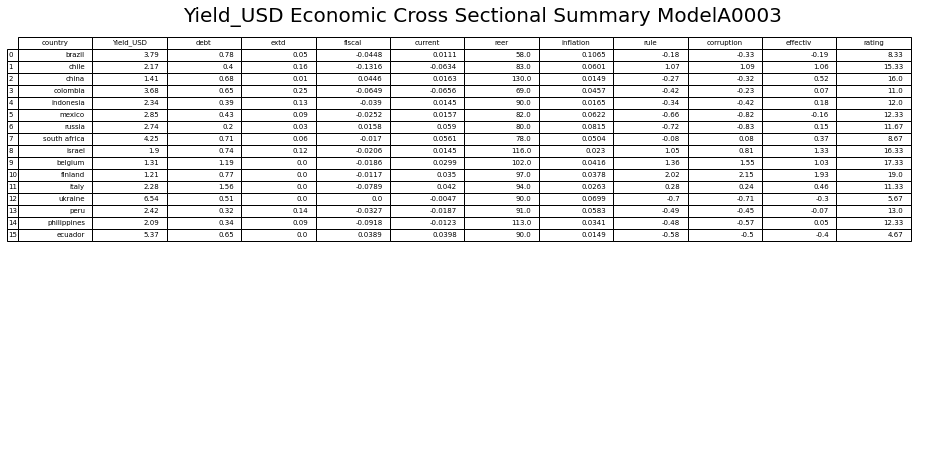

In [14]:
ms = pd.DataFrame(economic1)

#PART 1 SUMARRY  
os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')
#K:\2020_2431\q\hc_report\usd\cross_eco\report
print(os.getcwd())

  
final_location_first = ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report_f\\")
final_location_last = '.pdf'

#file location
location_first= ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\")
today = str(date.today())+"_"
location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label=str(y)+" Economic Cross Sectional Summary ModelA0003"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)


# set fig size
fig, ax = plt.subplots(figsize=(16,8)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
tab = table(ax, ms, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(7) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
plt.savefig(location)
plt.savefig("001_summary_economic.pdf")
plt.savefig(final_location_first+ "001_summary_Eco" +final_location_last )


plt.show()

In [15]:
seed(1)
z=random()
print(z) 

0.13436424411240122


In [16]:
economic2=economic2[['country', str(y),'m011','r_m011','m021','r_m021','m031','r_m031','m041','r_m041','m051','r_m051']]
#economic2=pd.merge(summ, economic2,  how='left', left_on=['country'], right_on = ['country'])
###
economic2['m011']=economic2['m011'].round(1)
economic2['m021']=economic2['m021'].round(1)
economic2['m031']=economic2['m031'].round(1)
economic2['m041']=economic2['m041'].round(1)
economic2['m051']=economic2['m051'].round(1)
####
economic2['r_m011']=(economic2['r_m011'].round(3)+z)
economic2['r_m021']=(economic2['r_m021'].round(3)+z)
economic2['r_m031']=(economic2['r_m031'].round(3)+z)
economic2['r_m041']=(economic2['r_m041'].round(3)+z)
economic2['r_m051']=(economic2['r_m051'].round(3)+z)


####
economic2['r_m011']=(economic2['r_m011'].round(2))
economic2['r_m021']=(economic2['r_m021'].round(2))
economic2['r_m031']=(economic2['r_m031'].round(2))
economic2['r_m041']=(economic2['r_m041'].round(2))
economic2['r_m051']=(economic2['r_m051'].round(2))


print(economic2)

         country  Yield_USD  m011  r_m011  m021  r_m021  m031  r_m031  m041  \
0         brazil       3.79   3.7    0.21   4.4   -0.47   4.2   -0.28   4.4   
1          chile       2.17   1.7    0.65   1.6    0.69   2.0    0.26   1.9   
2          china       1.41   3.0   -1.50   2.2   -0.70   2.0   -0.43   1.5   
3       colombia       3.68   3.0    0.77   3.0    0.76   3.7    0.11   3.3   
4      indonesia       2.34   2.7   -0.25   3.0   -0.48   3.1   -0.58   2.9   
5         mexico       2.85   3.6   -0.66   3.8   -0.78   3.7   -0.69   2.9   
6         russia       2.74   4.1   -1.27   4.3   -1.38   3.2   -0.31   3.2   
7   south africa       4.25   4.3    0.13   4.3    0.13   4.3    0.13   4.2   
8         israel       1.90   1.7    0.31   1.2    0.81   1.1    0.95   1.4   
9        belgium       1.31   1.7   -0.26   1.7   -0.27   1.8   -0.39   1.1   
10       finland       1.21   1.1    0.21   1.5   -0.15   0.6    0.78   0.6   
11         italy       2.28   2.1    0.28   2.6   -0

<ipython-input-16-2dbb42309867>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic2['m011']=economic2['m011'].round(1)
<ipython-input-16-2dbb42309867>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic2['m021']=economic2['m021'].round(1)
<ipython-input-16-2dbb42309867>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

K:\2020_2431\q\hc_report\usd\cross_eco\report
2021-11-23 12:14:45.474650
K:\2020_2431\q\hc_report\usd\cross_eco\2021-11-23_Yield_USD Economic Cross Sectional Summary ModelA0003_Output_fig.pdf


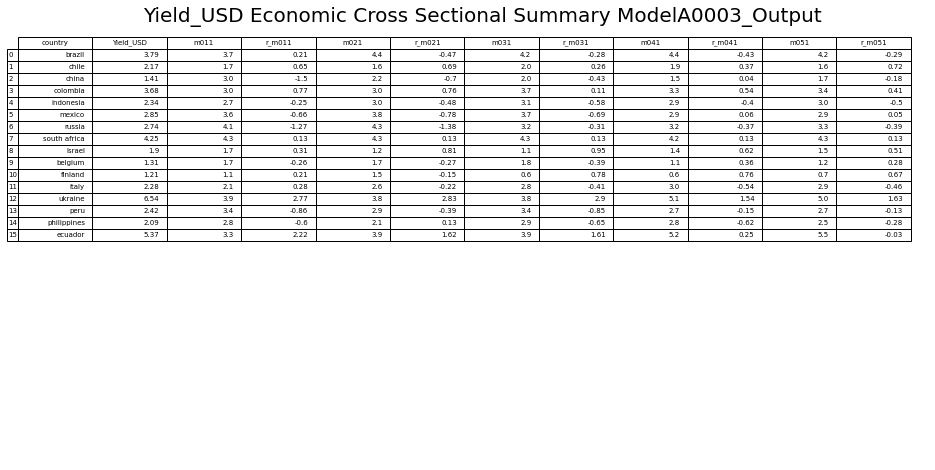

COmplete


In [17]:
ms = pd.DataFrame(economic2)

#PART 1 SUMARRY  
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
#K:\2020_2431\q\hc_report\usd\cross_eco\report
os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')    
print(os.getcwd())

final_location_first = ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report_f\\")  
#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report_f\\")
final_location_last = '.pdf'

#file location
location_first= ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\")
#location_first= ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\")
today = str(date.today())+"_"
location_last = '_fig.pdf'

#title_graph="EM CDS - Rating Fit Model "
label=str(y)+ " Economic Cross Sectional Summary ModelA0003_Output"
dateTimeObj = str(datetime.now())
print(dateTimeObj)
location=location_first+today+label+location_last
#location=location_first+label+dateTimeObj+location_last
print(location)


# set fig size
fig, ax = plt.subplots(figsize=(16, 8)) 
# no axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
# no frame
ax.set_frame_on(False)  
# plot table
#here 
tab = table(ax, ms, loc='upper right')  
# set font manually
tab.auto_set_font_size(False)
tab.set_fontsize(7) 
plt.title(label, size=20)
plt.xlabel("TODAY DATE TIME", size=20)
# save the result
plt.savefig(location)
plt.savefig("002_summary_cross_model.pdf")
plt.savefig(final_location_first+ "001_summary_Model" +final_location_last )


plt.show()
print("COmplete")

In [18]:
#economic2
#be carefulllllll
graph_data=economic2

K:\2020_2431\q\hc_report\usd\cross_eco\report
    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m011        2
         country     Status  Values order_sort  order_3
24       ukraine  Yield_USD    6.54  Yield_USD       10
25       ukraine       m011    3.90       m011       20
30       ecuador  Yield_USD    5.37  Yield_USD       20
14  south africa  Yield_USD    4.25  Yield_USD       30
0         brazil  Yield_US

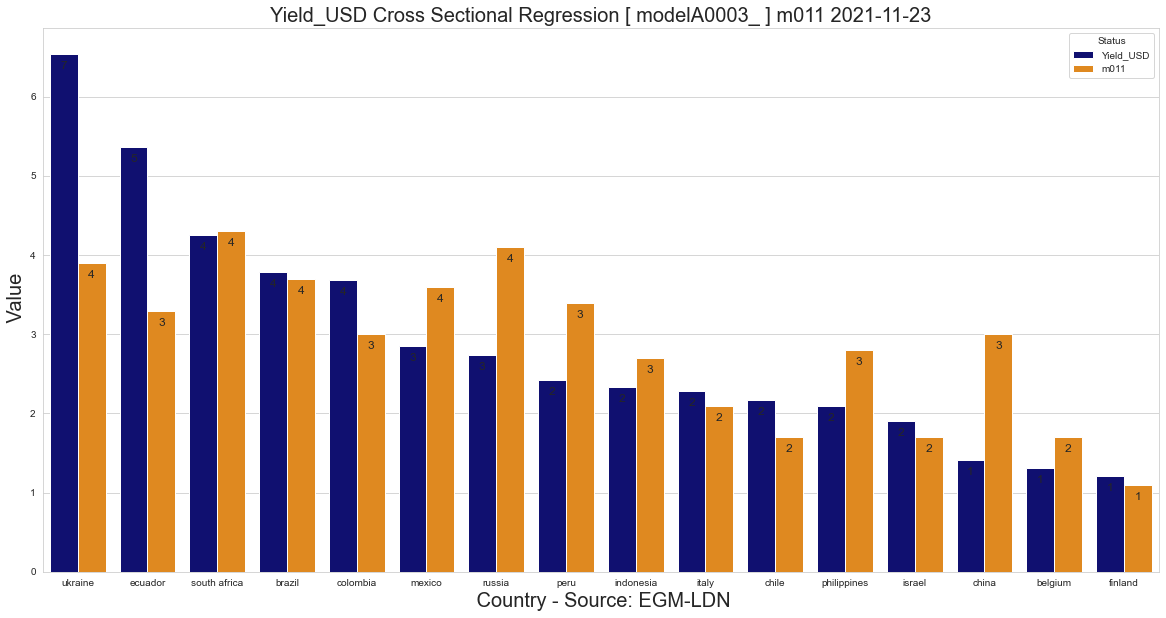

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m021        2
         country     Status  Values order_sort  order_3
24       ukraine  Yield_USD    6.54  Yield_USD       10
25       ukraine       m021    3.80       m021       20
30       ecuador  Yield_USD    5.37  Yield_USD       20
14  south africa  Yield_USD    4.25  Yield_USD       30
0         brazil  Yield_USD    3.79  Yield_USD       40
31       ecuador

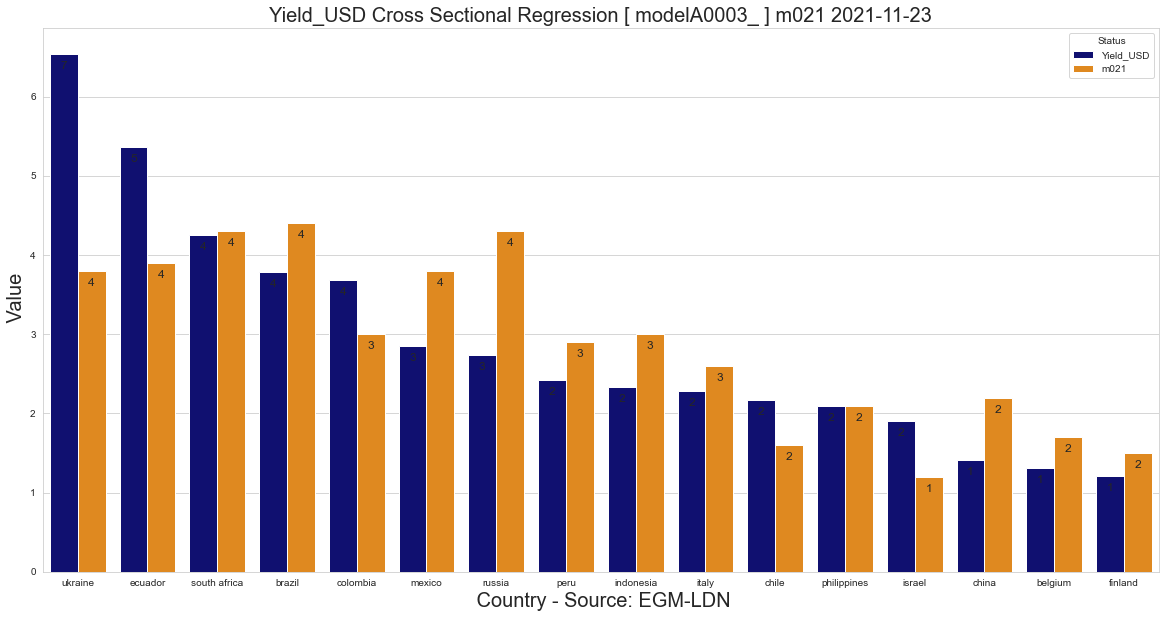

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m031        2
         country     Status  Values order_sort  order_3
24       ukraine  Yield_USD    6.54  Yield_USD       10
25       ukraine       m031    3.80       m031       20
30       ecuador  Yield_USD    5.37  Yield_USD       20
14  south africa  Yield_USD    4.25  Yield_USD       30
0         brazil  Yield_USD    3.79  Yield_USD       40
31       ecuador

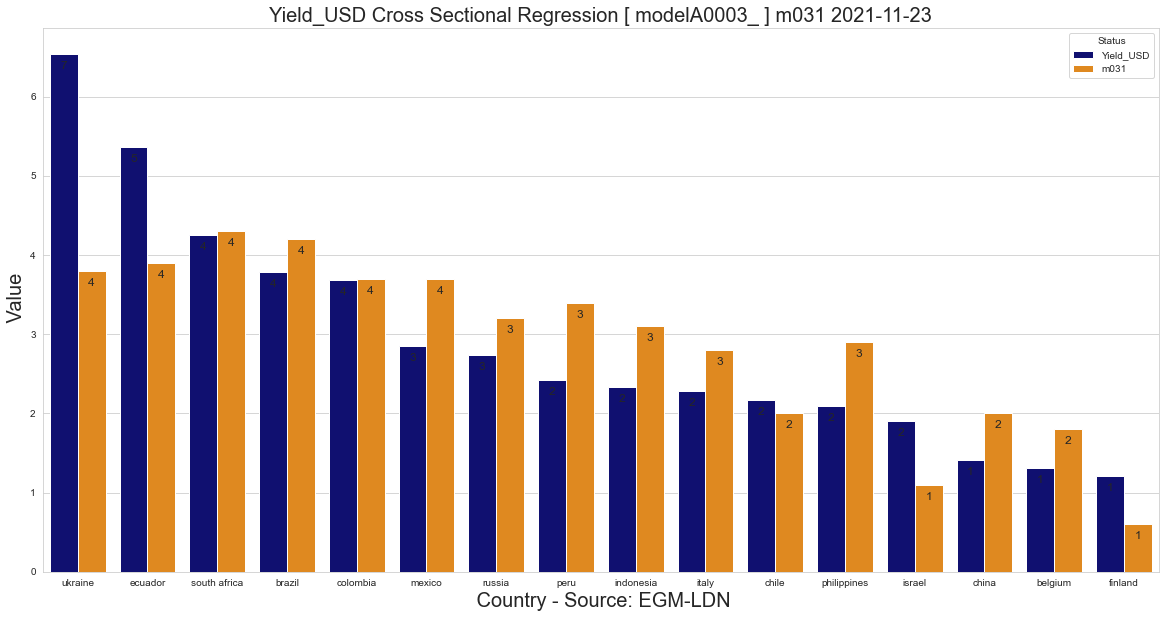

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m041        2
         country     Status  Values order_sort  order_3
24       ukraine  Yield_USD    6.54  Yield_USD       10
25       ukraine       m041    5.10       m041       20
30       ecuador  Yield_USD    5.37  Yield_USD       20
14  south africa  Yield_USD    4.25  Yield_USD       30
0         brazil  Yield_USD    3.79  Yield_USD       40
31       ecuador

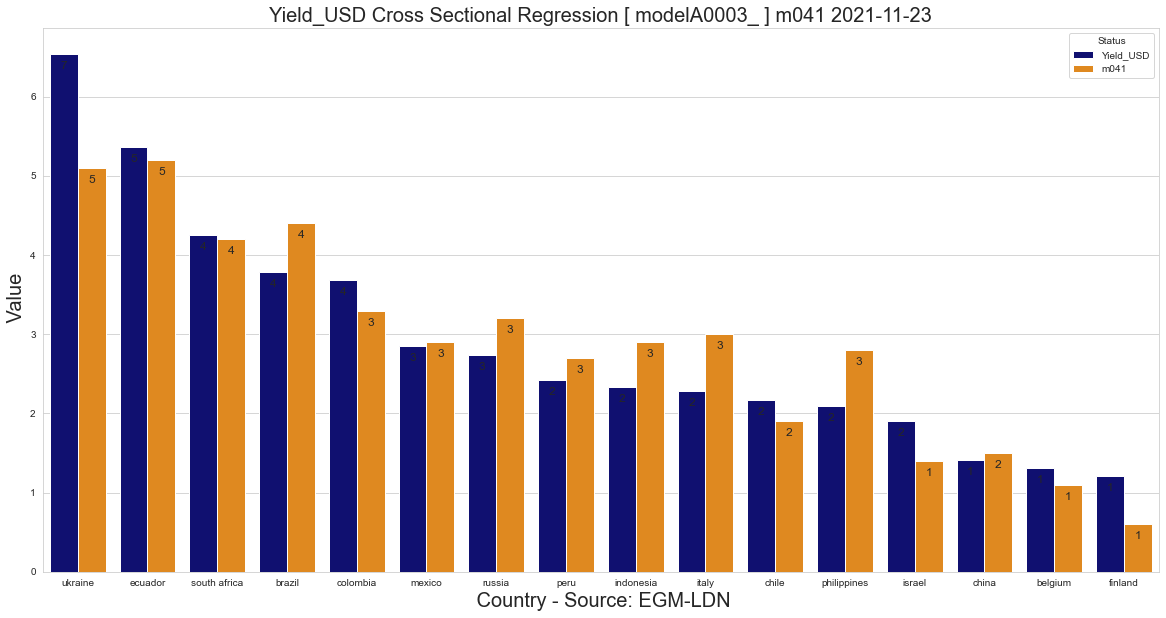

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m051        2
         country     Status  Values order_sort  order_3
24       ukraine  Yield_USD    6.54  Yield_USD       10
25       ukraine       m051    5.00       m051       20
30       ecuador  Yield_USD    5.37  Yield_USD       20
14  south africa  Yield_USD    4.25  Yield_USD       30
0         brazil  Yield_USD    3.79  Yield_USD       40
31       ecuador

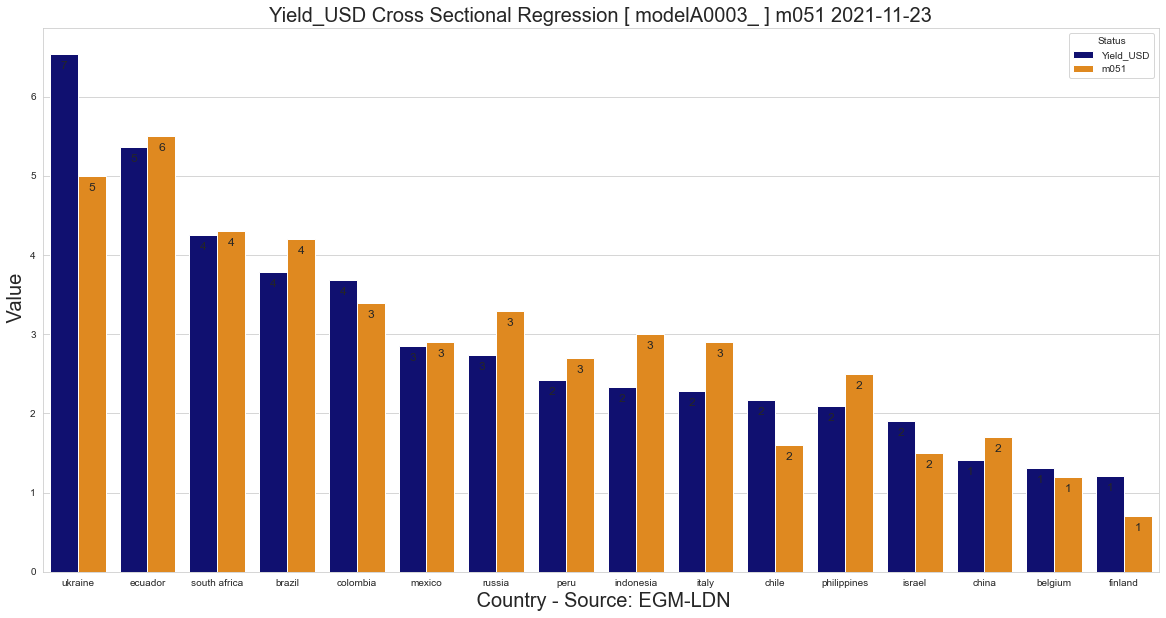

In [19]:
####graph for each cds and teh varaibles x5,sort
#graph with each residaul of the modesl  x5, sort

###https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
#part 3 pdf ALL COUNTRUES
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')
print(os.getcwd())

location_first= ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report_f\\")
#location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report_f\\")
location_last = '.pdf'


########update!--------------
name='modelA0003_'
methodology=str(y)+" Cross Sectional Regression"
variable_text='latest  market value'
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph=str(y)+" - Rating Fit Model "
c_label=" Country - Source: EGM-LDN"
y_label=" Value"
fig_name="cross economic"

########---------------------



lst = ['m011','m021','m031','m041','m051']
####
#lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    model=str(lst[x])   
    graph_input= graph_data[['country',str(y),str(model)]]
    chart=graph_input
    order_t=chart[['country',str(y)]]
    order_t = order_t.sort_values([str(y)], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t[str(y)]
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
    
    ########---------------------
    
    title_text=(methodology+" "+name_text+" "+model+" "+end)
    location=location_first+today+name+model+location_last
    fig_name_t=fig_name+model+".jpg"
    r_name="r_"+name

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)


    #large and height
    plt.figure(figsize=(20,10))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(str(y_label), size=20)
    plt.xlabel(str(c_label), size=20)
    plt.title(str(title_text), size=20)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location, bbox_inches='tight')
    plt.savefig(fig_name_t, bbox_inches='tight')
    plt.show()

K:\2020_2431\q\hc_report\usd\cross_eco\report
    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       3      colombia       30
3       1         chile       40
4       8        israel       50
5      11         italy       60
6       0        brazil       70
7      10       finland       80
8       7  south africa       90
9       4     indonesia      100
10      9       belgium      110
11     14   philippines      120
12      5        mexico      130
13     13          peru      140
14      6        russia      150
15      2         china      160
   order order_sort  order_2
0      1     r_m011        1
         country  Status  Values order_sort  order_3
12       ukraine  r_m011    2.77     r_m011       10
15       ecuador  r_m011    2.22     r_m011       20
3       colombia  r_m011    0.77     r_m011       30
1          chile  r_m011    0.65     r_m011       40
8         israel  r_m011    0.31     r_m011       50
11         italy 

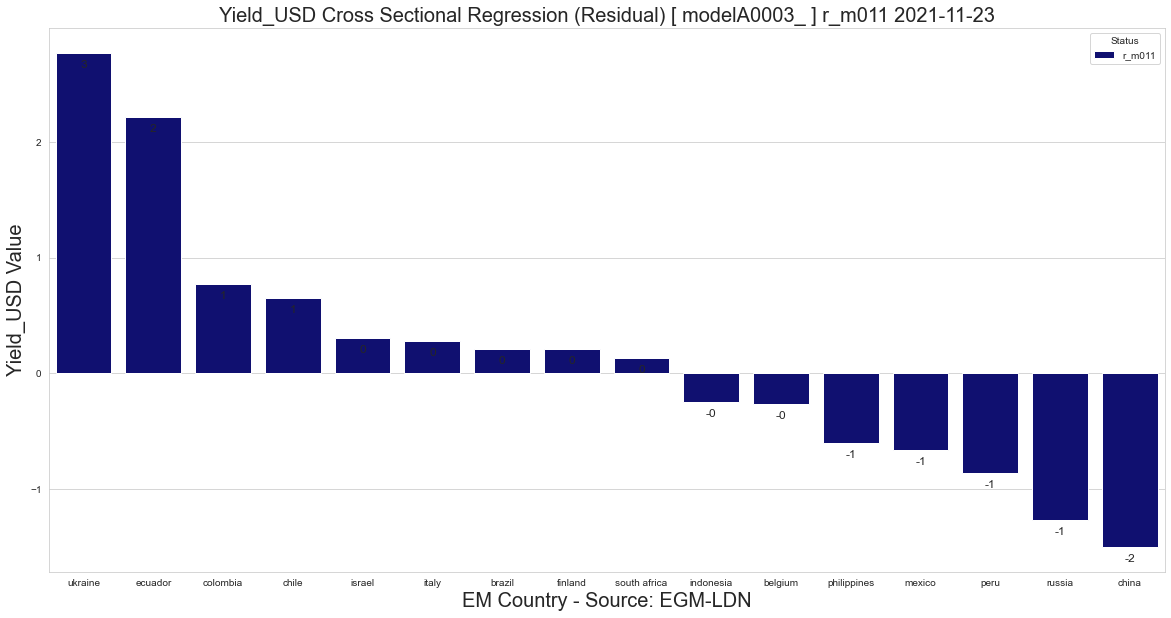

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       8        israel       30
3       3      colombia       40
4       1         chile       50
5       7  south africa       60
6      14   philippines       70
7      10       finland       80
8      11         italy       90
9       9       belgium      100
10     13          peru      110
11      0        brazil      120
12      4     indonesia      130
13      2         china      140
14      5        mexico      150
15      6        russia      160
   order order_sort  order_2
0      1     r_m021        1
         country  Status  Values order_sort  order_3
12       ukraine  r_m021    2.83     r_m021       10
15       ecuador  r_m021    1.62     r_m021       20
8         israel  r_m021    0.81     r_m021       30
3       colombia  r_m021    0.76     r_m021       40
1          chile  r_m021    0.69     r_m021       50
7   south africa  r_m021    0.13     r_m021       60
14   phili

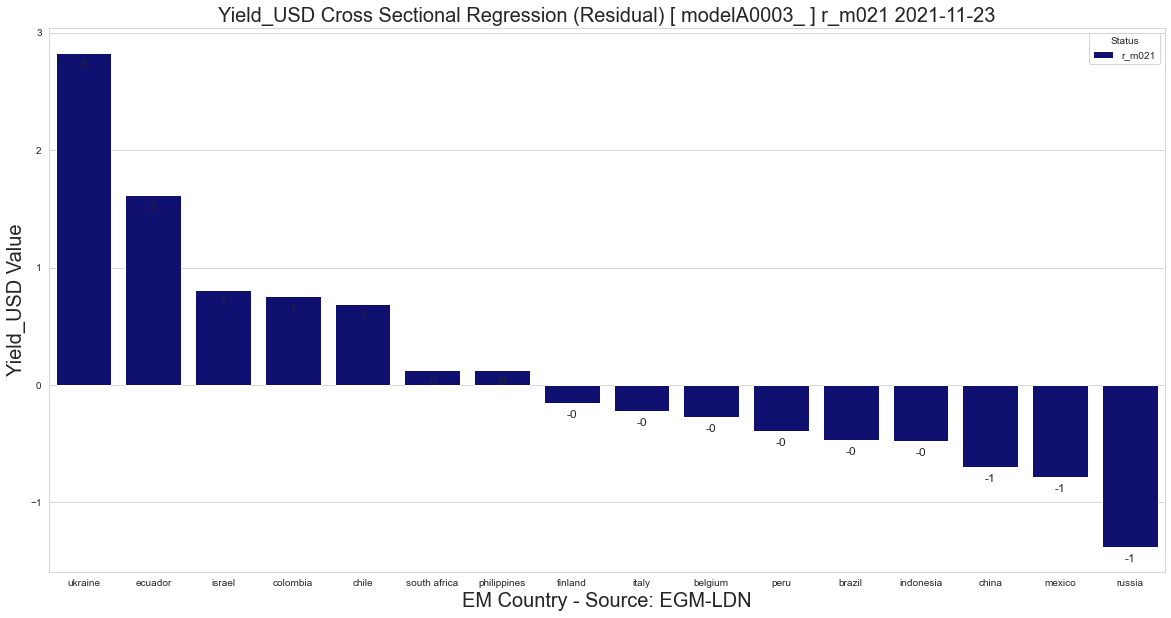

    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       8        israel       30
3      10       finland       40
4       1         chile       50
5       7  south africa       60
6       3      colombia       70
7       0        brazil       80
8       6        russia       90
9       9       belgium      100
10     11         italy      110
11      2         china      120
12      4     indonesia      130
13     14   philippines      140
14      5        mexico      150
15     13          peru      160
   order order_sort  order_2
0      1     r_m031        1
         country  Status  Values order_sort  order_3
12       ukraine  r_m031    2.90     r_m031       10
15       ecuador  r_m031    1.61     r_m031       20
8         israel  r_m031    0.95     r_m031       30
10       finland  r_m031    0.78     r_m031       40
1          chile  r_m031    0.26     r_m031       50
7   south africa  r_m031    0.13     r_m031       60
3       co

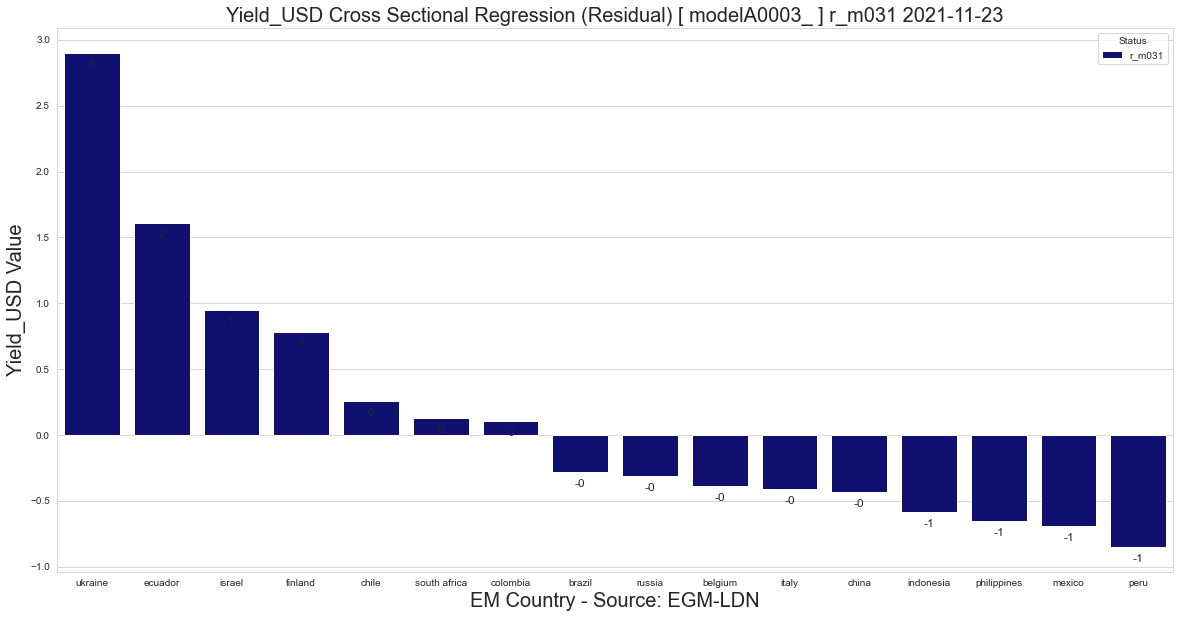

    order       country  order_1
0      12       ukraine       10
1      10       finland       20
2       8        israel       30
3       3      colombia       40
4       1         chile       50
5       9       belgium       60
6      15       ecuador       70
7       7  south africa       80
8       5        mexico       90
9       2         china      100
10     13          peru      110
11      6        russia      120
12      4     indonesia      130
13      0        brazil      140
14     11         italy      150
15     14   philippines      160
   order order_sort  order_2
0      1     r_m041        1
         country  Status  Values order_sort  order_3
12       ukraine  r_m041    1.54     r_m041       10
10       finland  r_m041    0.76     r_m041       20
8         israel  r_m041    0.62     r_m041       30
3       colombia  r_m041    0.54     r_m041       40
1          chile  r_m041    0.37     r_m041       50
9        belgium  r_m041    0.36     r_m041       60
15       e

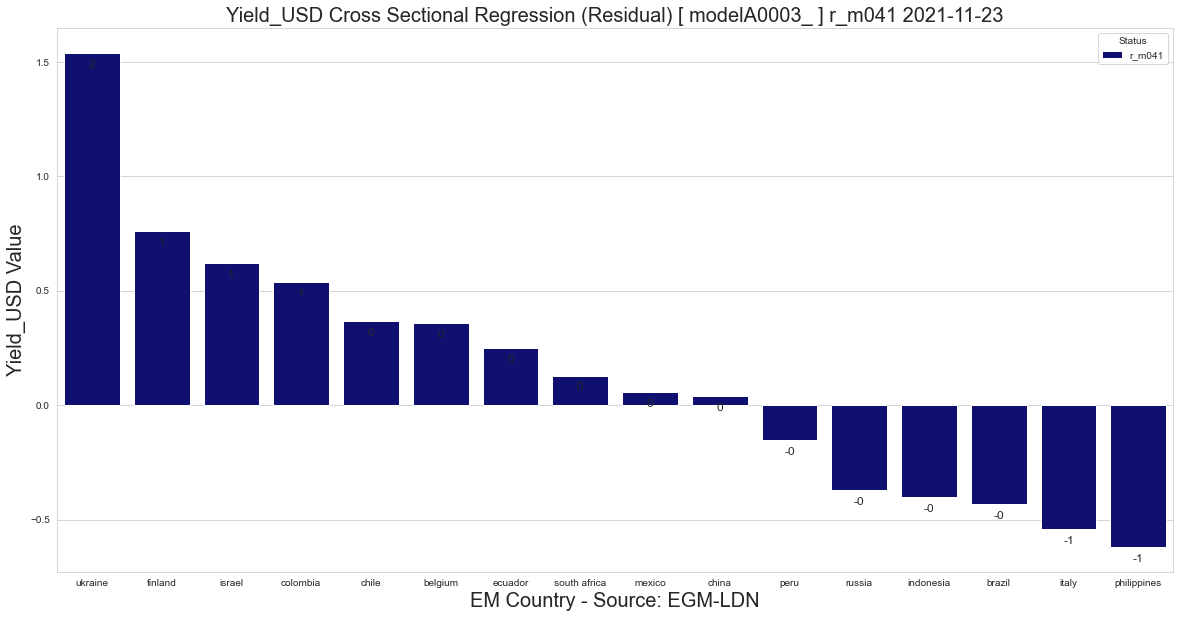

    order       country  order_1
0      12       ukraine       10
1       1         chile       20
2      10       finland       30
3       8        israel       40
4       3      colombia       50
5       9       belgium       60
6       7  south africa       70
7       5        mexico       80
8      15       ecuador       90
9      13          peru      100
10      2         china      110
11     14   philippines      120
12      0        brazil      130
13      6        russia      140
14     11         italy      150
15      4     indonesia      160
   order order_sort  order_2
0      1     r_m051        1
         country  Status  Values order_sort  order_3
12       ukraine  r_m051    1.63     r_m051       10
1          chile  r_m051    0.72     r_m051       20
10       finland  r_m051    0.67     r_m051       30
8         israel  r_m051    0.51     r_m051       40
3       colombia  r_m051    0.41     r_m051       50
9        belgium  r_m051    0.28     r_m051       60
7   south 

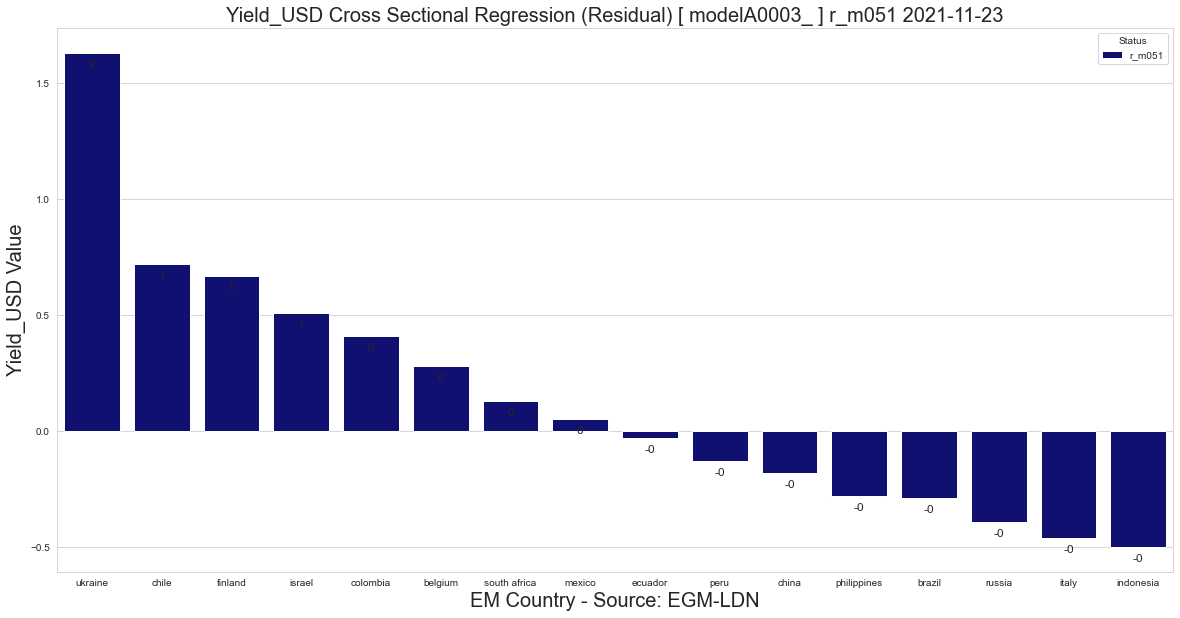

In [20]:
####RESIDUAL
###https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
#K:\2020_2431\q\hc_report\usd\cross_eco
    
print(os.getcwd())

location_first= ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report_f\\")
#location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report_f\\")
location_last = '.pdf'


########update!--------------
name='modelA0003_'
methodology=str(y)+" Cross Sectional Regression (Residual)"
variable_text='latest CDS market value'
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph=str(y)+" - Rating Fit Model "
c_label="EM Country - Source: EGM-LDN"
y_label=str(y)+" Value"
fig_name="cross economic res"

########---------------------



lst = ['r_m011','r_m021','r_m031','r_m041','r_m051']


for x in range(len(lst)):      
    model=str(lst[x])   
    graph_input= graph_data[['country',str(model)]]
    chart=graph_input
    order_t=chart[['country',str(model)]]
    order_t = order_t.sort_values([str(model)], ascending=[False])
    order_t = order_t.reset_index()
    order_t = order_t.rename(columns={"index":"order"})
    order_t['order_1'] = (order_t.index + 1)*10
    del order_t[str(model)]
    print(order_t)
    o_list=chart.columns 
    o_list = pd.DataFrame(o_list)
    o_list.columns=["order_sort"]
    o_list.drop(o_list.index[:1], inplace=True)
    o_list = o_list.reset_index()
    o_list = o_list.rename(columns={"index":"order"})
    o_list['order_2'] = (o_list.index + 1)
    print(o_list)
    


    ########---------------------
    title_text=(methodology+" "+name_text+" "+model+" "+end)
    location=location_first+today+name+model+location_last
    fig_name_t=fig_name+model+".jpg"
    r_name="r_"+name

    chart.set_index('country', inplace=True)
    df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
    df1 = df1.reset_index()
    df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
    df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
    df1['order_3']=(df1['order_1']*df1['order_2'])
    df1 = df1.sort_values(['order_3'], ascending=[True])
    del df1['order_1']
    del df1['order_2']
    #be careful
    df1['Values']=(df1['Values']*1)
    print(df1)


    #large and height
    plt.figure(figsize=(20,10))
    sns.set_style('whitegrid')
    splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
    plt.ylabel(str(y_label), size=20)
    plt.xlabel(str(c_label), size=20)
    plt.title(str(title_text), size=20)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
    plt.savefig(location, bbox_inches='tight')
    plt.savefig(fig_name_t, bbox_inches='tight')
    plt.show()
    





In [21]:
    
#pART 

os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')    
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())

final_location_first = ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report_f\\")
#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\tc\\report_f\\")
final_location_last = '.pdf'

#######
list_im = ["cross economicm011.jpg","cross economic resr_m011.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm011f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 



#######
list_im = ["cross economicm021.jpg","cross economic resr_m021.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm021f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 


#######
list_im = ["cross economicm031.jpg","cross economic resr_m031.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm031f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 


#######
list_im = ["cross economicm041.jpg","cross economic resr_m041.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm041f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 




#######
list_im = ["cross economicm051.jpg","cross economic resr_m051.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# for a vertical stacking it is simple: use vstack
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( '003_cross economicm051f.pdf' )
#imgs_comb.save( str(final_location_first+"002_technical"+final_location_last) ) 



K:\2020_2431\q\hc_report\usd\cross_eco\report


<ipython-input-21-e7d185a14ae5>:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-21-e7d185a14ae5>:19: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-21-e7d185a14ae5>:31: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-2

In [22]:
###########
#############
print(graph_data)

         country  Yield_USD  m011  r_m011  m021  r_m021  m031  r_m031  m041  \
0         brazil       3.79   3.7    0.21   4.4   -0.47   4.2   -0.28   4.4   
1          chile       2.17   1.7    0.65   1.6    0.69   2.0    0.26   1.9   
2          china       1.41   3.0   -1.50   2.2   -0.70   2.0   -0.43   1.5   
3       colombia       3.68   3.0    0.77   3.0    0.76   3.7    0.11   3.3   
4      indonesia       2.34   2.7   -0.25   3.0   -0.48   3.1   -0.58   2.9   
5         mexico       2.85   3.6   -0.66   3.8   -0.78   3.7   -0.69   2.9   
6         russia       2.74   4.1   -1.27   4.3   -1.38   3.2   -0.31   3.2   
7   south africa       4.25   4.3    0.13   4.3    0.13   4.3    0.13   4.2   
8         israel       1.90   1.7    0.31   1.2    0.81   1.1    0.95   1.4   
9        belgium       1.31   1.7   -0.26   1.7   -0.27   1.8   -0.39   1.1   
10       finland       1.21   1.1    0.21   1.5   -0.15   0.6    0.78   0.6   
11         italy       2.28   2.1    0.28   2.6   -0

K:\2020_2431\q\hc_report\usd\cross_eco\report
    order       country  order_1
0      12       ukraine       10
1      15       ecuador       20
2       7  south africa       30
3       0        brazil       40
4       3      colombia       50
5       5        mexico       60
6       6        russia       70
7      13          peru       80
8       4     indonesia       90
9      11         italy      100
10      1         chile      110
11     14   philippines      120
12      8        israel      130
13      2         china      140
14      9       belgium      150
15     10       finland      160
   order order_sort  order_2
0      1  Yield_USD        1
1      2       m011        2
2      3       m021        3
3      4       m031        4
4      5       m041        5
5      6       m051        6
         country     Status  Values order_sort  order_3
72       ukraine  Yield_USD    6.54  Yield_USD       10
73       ukraine       m011    3.90       m011       20
90       ecuador  Yiel

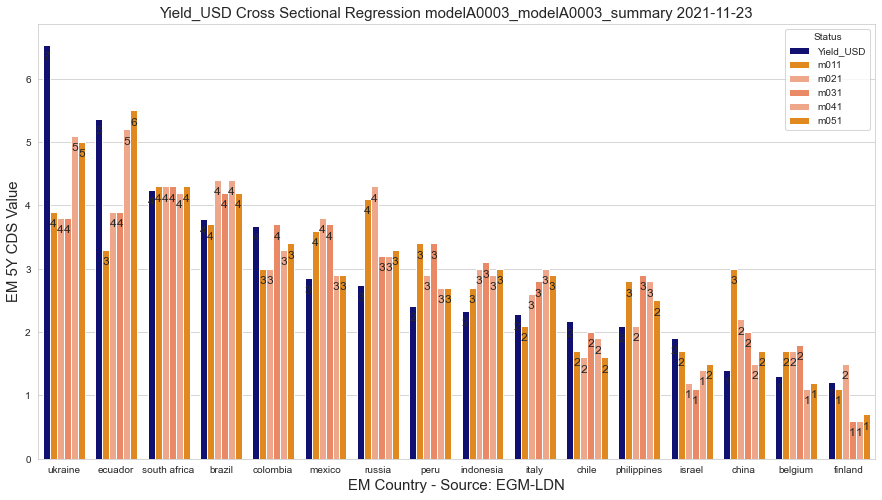

In [23]:
########update!--------------
###sumarry models
########---------------------


parameter_y=15
parameter_x=15
parameter_z=15
parameter_f1=15    
parameter_f2=8   
parameter_t=10


os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report')
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/report')
print(os.getcwd())

location_first = ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report\\004_")
#location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report\\004_")
location_last = '.pdf'


########update!--------------
name_series='modelA0003_summary'
methodology=str(y)+" Cross Sectional Regression "
variable_text="latest "+str(y)+"market value"
#filter_text ="No filter"
#expectation_text="H.Expect"
name_text=str("[ "+name+" ]")
comparison="XCountry Comparison"
p_parameter=2
title_graph=str(y)+" - Rating Fit Model "
x_label="EM Country - Source: EGM-LDN"
y_label="EM 5Y CDS Value"
fig_name="cross economic res"
z_title =str(y)+" Cross Sectional Regression "
########---------------------


name_text=name + name_series
z_title1=z_title+name_text+" "+end
location=location_first+name_series+location_last
    
    
graph_input=graph_data[['country',str(y),'m011','m021','m031','m041','m051']]
chart=graph_input
order_t=chart[['country',str(y)]]
order_t = order_t.sort_values([str(y)], ascending=[False])
order_t = order_t.reset_index()
order_t = order_t.rename(columns={"index":"order"})
order_t['order_1'] = (order_t.index + 1)*10
del order_t[str(y)]
print(order_t)
o_list=chart.columns 
o_list = pd.DataFrame(o_list)
o_list.columns=["order_sort"]
o_list.drop(o_list.index[:1], inplace=True)
o_list = o_list.reset_index()
o_list = o_list.rename(columns={"index":"order"})
o_list['order_2'] = (o_list.index + 1)
print(o_list)
 

chart.set_index('country', inplace=True)
df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
df1 = df1.reset_index()
df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
df1['order_3']=(df1['order_1']*df1['order_2'])
df1 = df1.sort_values(['order_3'], ascending=[True])
del df1['order_1']
del df1['order_2']
#be careful
df1['Values']=(df1['Values']*1)
print(df1)

#graph specifics
#large and height
plt.figure(figsize=(parameter_f1,parameter_f2))
sns.set_style('whitegrid')
splot=sns.barplot(x='country', hue="Status", y="Values",
                      palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
plt.ylabel(y_label, size=parameter_y)
plt.xlabel(x_label, size=parameter_x)
plt.title(z_title1, size=parameter_z)
plt.tick_params(labelsize=parameter_t)

for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
#plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.savefig(location)
plt.show()


    
    
    

K:\2020_2431\q\hc_report\usd\cross_eco\scatterplot


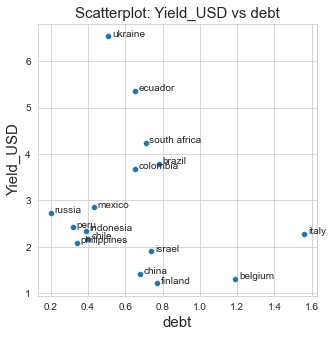

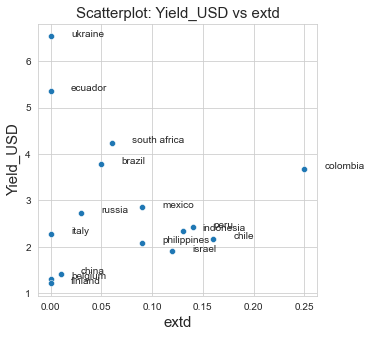

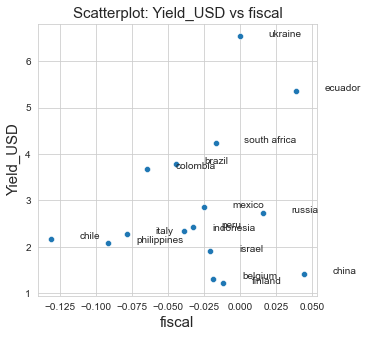

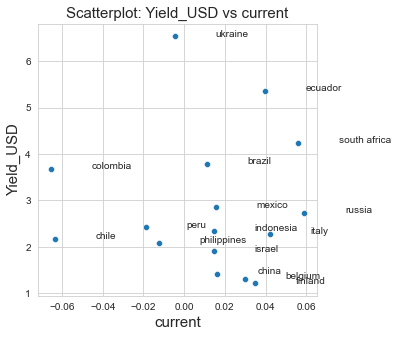

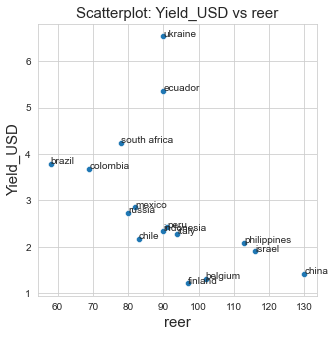

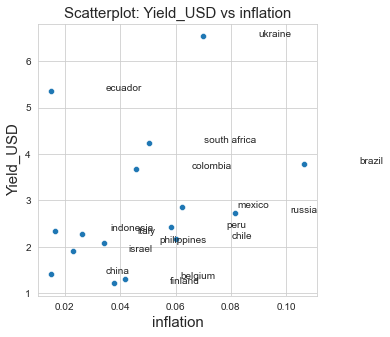

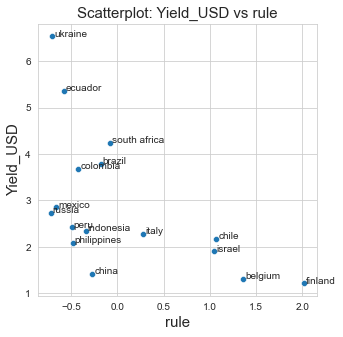

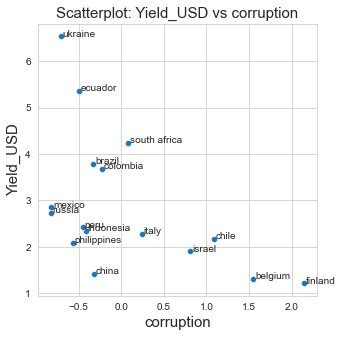

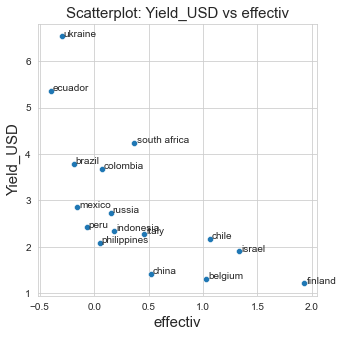

In [24]:
#print(economic1)
#debt  extd  fiscal  current   reer
#inflation  rule  corruption  effectiv  rating 

os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/scatterplot')    
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')
print(os.getcwd())

#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\tc\\report_f\\")
#final_location_last = '.pdf'


df = economic1
df = df[df.country != 'turkey']
y_label=str(y)
title0="Scatterplot: "+str(y)+" vs "
parameter_l=15
parameter_1=5
parameter_2=5

######################################################
x_variable="debt"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="extd"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="fiscal"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="current"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="reer"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="inflation"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="rule"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()


######################################################
x_variable="corruption"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()



######################################################
x_variable="effectiv"

title= str(title0 + x_variable)
plt.figure(figsize=(parameter_1,parameter_2))
sns.set_style('whitegrid')
sns.scatterplot(data = df, x =str(x_variable), y = str(y))
plt.ylabel(y_label, size=parameter_l)
plt.xlabel(x_variable, size=parameter_l)
plt.title(title, size=parameter_l)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df[str(x_variable)], df[str(y)], df['country'], plt.gca())  
plt.savefig(str(x_variable+".jpg"), bbox_inches='tight')
plt.show()

In [25]:
os.chdir('K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/scatterplot')
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')


final_location_first = ("K:\\2020_2431\\q\\hc_report\\"+str(y0)+"\\cross_eco\\report\\004_")
#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report\\004_")
final_location_last = '.pdf'


list_im = [str("debt.jpg"),str("extd.jpg"),str("inflation.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f1.jpg") ) 


    
list_im = [str("fiscal.jpg"),str("current.jpg"),str("reer.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f2.jpg") ) 


list_im = [str("corruption.jpg"),str("effectiv.jpg"),str("rule.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f3.jpg") ) 


list_im = [str("corruption.jpg"),str("effectiv.jpg"),str("rule.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str("f3.jpg") ) 





list_im = [str("f1.jpg"),str("f2.jpg"),str("f3.jpg")]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"002_z scatterplot.pdf") ) 



<ipython-input-25-898ec2729c92>:14: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-25-898ec2729c92>:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-25-898ec2729c92>:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
<ipython-input-2

In [26]:
source_dir ='K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report/'
source_dir2 = 'K:/2020_2431/q/hc_report/'+str(y0)+'/cross_eco/report_f2/'

#source_dir = 'K:/2020_2431/q/cds_report/images/cross_eco/report/'
#source_dir2 = 'K:/2020_2431/q/cds_report/images/cross_eco/report_f2/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + str(y)+'_0003_CrossEconomic_Complete.pdf')       
merger.close()

In [27]:
####
#######change hard saved!!!!
#Copy and apste public
import subprocess


src=r'K:\2020_2431\q\hc_report\usd\cross_eco\report_f2\Yield_USD_0003_CrossEconomic_Complete.pdf'
dst=r'P:\Technology\AlphaQuant\pdf_render_svc_files\AlanM\hc_usd\Yield_USD_0003_CrossEconomic_Complete.pdf'  
cmd='copy "%s" "%s"' % (src, dst)
status = subprocess.call(cmd, shell=True)


src=r'K:\2020_2431\q\hc_report\usd\cross_eco\report\004_modelA0003_summary.pdf'
dst=r'P:\Technology\AlphaQuant\pdf_render_svc_files\AlanM\hc_usd\Yield_USD_004_modelA0003_summary.pdf'  
cmd='copy "%s" "%s"' % (src, dst)
status = subprocess.call(cmd, shell=True)



In [28]:
######save output
output = economic2[['country',str(y),'m011','m021','m031','m041','m051']]
print(output)
output=output.reset_index(drop=True)
#max_date=output004['time'].max()
#print(max_date)
#output004=output004[output004.time == max_date ]
#'avg_m0200','avg_m0300','avg_m0400'
#output['model003_m0100']=output[['m011']]
#output['model003_m0200']=output[['m021']]
#output['model003_m0300']=output[['m031']]
#output['model003_m0400']=output[['m041']]
#output['model003_m0500']=output[['m051']]
#output=output[['country','cds','model003_m0100','model003_m0200','model003_m0300','model003_m0400','model003_m0500']]
##output=output[['country','cds','model002_m0100']]
#print(output)
#output003=output
#output003.to_csv (r'K:\2020_2431\q\cds_report\output\output003.csv', index = False, header=True)



         country  Yield_USD  m011  m021  m031  m041  m051
0         brazil       3.79   3.7   4.4   4.2   4.4   4.2
1          chile       2.17   1.7   1.6   2.0   1.9   1.6
2          china       1.41   3.0   2.2   2.0   1.5   1.7
3       colombia       3.68   3.0   3.0   3.7   3.3   3.4
4      indonesia       2.34   2.7   3.0   3.1   2.9   3.0
5         mexico       2.85   3.6   3.8   3.7   2.9   2.9
6         russia       2.74   4.1   4.3   3.2   3.2   3.3
7   south africa       4.25   4.3   4.3   4.3   4.2   4.3
8         israel       1.90   1.7   1.2   1.1   1.4   1.5
9        belgium       1.31   1.7   1.7   1.8   1.1   1.2
10       finland       1.21   1.1   1.5   0.6   0.6   0.7
11         italy       2.28   2.1   2.6   2.8   3.0   2.9
12       ukraine       6.54   3.9   3.8   3.8   5.1   5.0
13          peru       2.42   3.4   2.9   3.4   2.7   2.7
14   philippines       2.09   2.8   2.1   2.9   2.8   2.5
15       ecuador       5.37   3.3   3.9   3.9   5.2   5.5


In [29]:
####review
#source_dir2 = 'K:/2020_2431/q/cds_report/images/cross_eco/report_f2/'
#merger.write(source_dir2 + 'EMCDS_0003_CrossEconomic_Complete.pdf')       
#output003.to_csv (r'K:\2020_2431\q\cds_report\output\output003.csv',
#os.chdir('K:/2020_2431/q/cds_report/images/cross_eco/scatterplot')
#final_location_first = ("K:\\2020_2431\\q\\cds_report\\images\\cross_eco\\report\\")
#location_first = ("K:\\2020_2431\\q\\cds_report\\images\\\cross_eco\\report\\004_")


timeclock.stop()
#Elapsed time: 99.7511 seconds
#Elapsed time: 84.5515 seconds
#Elapsed time: 89.8537 seconds
print("Compelte End")

Elapsed time: 72.1917 seconds
Compelte End
